In [105]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns

In [106]:
# Read raw data 
data_dir = 'stock_data'
data_path = os.path.join(data_dir, 'Raw.csv')
data = pd.read_csv(data_path)

In [107]:
#always good to do visual check
data.head()

,Unnamed: 0,Class,return,ret_1,ret_2,ret_3,ret_4,ret_5,return_sign,EMA_12,...,MACD_12_26,Williams,ATR_14,CCI,10_day_RSI,14_day_RSI,30_day_RSI,SRSI_10,SRSI_14,SRSI_30
0,0,0,-0.005824,-0.008952,0.010927,-0.015776,0.011812,0.000128,-1.0,5458.284660,...,-43.748542,-38.405878,99.271524,8.829789,65.932750,44.744277,41.146550,1.000000,-1.953481,0.000000
1,1,0,-0.032120,-0.005824,-0.008952,0.010927,-0.015776,0.011812,-1.0,5428.194742,...,-56.110089,-79.836309,112.015334,-87.906288,52.549425,42.559987,33.807005,0.727592,-0.198122,0.000000
2,2,1,0.007762,-0.032120,-0.005824,-0.008952,0.010927,-0.015776,1.0,5409.018598,...,-61.896972,-70.145969,111.139982,-91.475487,49.525965,45.054817,37.433078,0.666051,0.188870,0.494046
3,3,1,0.005600,0.007762,-0.032120,-0.005824,-0.008952,0.010927,1.0,5397.361891,...,-63.356230,-63.100492,119.448010,-25.986708,39.118869,51.174812,40.639210,0.454222,0.652182,0.930876
4,4,1,0.035447,0.005600,0.007762,-0.032120,-0.005824,-0.008952,1.0,5416.583108,...,-48.696618,-18.254117,130.161583,51.938443,52.836137,63.290641,46.523708,0.733428,1.000000,1.000000


In [108]:
#May need to clean a bit , drop first col
data.drop(data.columns[0], axis=1, inplace=True)

In [109]:
#Double check
data.head()

,Class,return,ret_1,ret_2,ret_3,ret_4,ret_5,return_sign,EMA_12,EMA_26,...,MACD_12_26,Williams,ATR_14,CCI,10_day_RSI,14_day_RSI,30_day_RSI,SRSI_10,SRSI_14,SRSI_30
0,0,-0.005824,-0.008952,0.010927,-0.015776,0.011812,0.000128,-1.0,5458.284660,5502.033202,...,-43.748542,-38.405878,99.271524,8.829789,65.932750,44.744277,41.146550,1.000000,-1.953481,0.000000
1,0,-0.032120,-0.005824,-0.008952,0.010927,-0.015776,0.011812,-1.0,5428.194742,5484.304831,...,-56.110089,-79.836309,112.015334,-87.906288,52.549425,42.559987,33.807005,0.727592,-0.198122,0.000000
2,1,0.007762,-0.032120,-0.005824,-0.008952,0.010927,-0.015776,1.0,5409.018598,5470.915570,...,-61.896972,-70.145969,111.139982,-91.475487,49.525965,45.054817,37.433078,0.666051,0.188870,0.494046
3,1,0.005600,0.007762,-0.032120,-0.005824,-0.008952,0.010927,1.0,5397.361891,5460.718120,...,-63.356230,-63.100492,119.448010,-25.986708,39.118869,51.174812,40.639210,0.454222,0.652182,0.930876
4,1,0.035447,0.005600,0.007762,-0.032120,-0.005824,-0.008952,1.0,5416.583108,5465.279727,...,-48.696618,-18.254117,130.161583,51.938443,52.836137,63.290641,46.523708,0.733428,1.000000,1.000000


In [110]:
# Check for missing data
data.isnull().sum() 

Class          0
return         0
ret_1          0
ret_2          0
ret_3          0
ret_4          0
ret_5          0
return_sign    0
EMA_12         0
EMA_26         0
10 Day ROI     0
20 Day ROI     0
30 Day ROI     0
Momentum       0
MACD_12_26     0
Williams       0
ATR_14         0
CCI            0
10_day_RSI     0
14_day_RSI     0
30_day_RSI     0
SRSI_10        0
SRSI_14        0
SRSI_30        0
dtype: int64

If all is good then lets start with some basic EDA

In [111]:
#Since no null and data is good , lets understanding the data
data.describe()

,Class,return,ret_1,ret_2,ret_3,ret_4,ret_5,return_sign,EMA_12,EMA_26,...,MACD_12_26,Williams,ATR_14,CCI,10_day_RSI,14_day_RSI,30_day_RSI,SRSI_10,SRSI_14,SRSI_30
count,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,...,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000,1671.000000
mean,0.456613,0.000438,0.000434,0.000443,0.000431,0.000435,0.000435,0.044285,7154.197630,7134.279145,...,19.918485,-42.035091,89.990611,15.790709,53.978549,53.971941,53.856953,0.534395,0.528713,0.507655
std,0.498263,0.009931,0.009934,0.009936,0.009944,0.009947,0.009947,0.998419,1586.481914,1572.080393,...,70.485874,32.092447,22.562012,88.859818,20.997111,17.462641,11.410848,0.221104,0.215210,0.221300
min,0.000000,-0.059151,-0.059151,-0.059151,-0.059151,-0.059151,-0.059151,-1.000000,4706.357199,4775.263670,...,-202.801852,-98.782793,47.402981,-245.823342,1.014388,4.867071,24.971602,-0.117152,-1.953481,-0.672872
25%,0.000000,-0.005021,-0.005031,-0.005031,-0.005032,-0.005032,-0.005032,-1.000000,5674.802362,5661.601914,...,-28.398099,-71.580734,74.295103,-58.187082,38.867653,41.950944,45.308573,0.379103,0.390574,0.351604
50%,0.000000,0.000428,0.000428,0.000431,0.000428,0.000428,0.000428,1.000000,7462.626110,7410.293643,...,28.716040,-35.916509,86.030869,30.630017,54.213546,53.435115,54.177373,0.539161,0.529133,0.521133
75%,1.000000,0.006020,0.006020,0.006029,0.006029,0.006043,0.006043,1.000000,8398.202741,8365.012145,...,72.863331,-11.741298,102.749706,88.923905,69.743528,66.873455,62.147098,0.699260,0.675543,0.657285
max,1.000000,0.038087,0.038087,0.038087,0.038087,0.038087,0.038087,1.000000,10415.620405,10349.463937,...,182.701070,-0.925662,180.212773,218.307295,100.000000,99.120710,82.636712,1.000000,1.000000,1.000000


[]

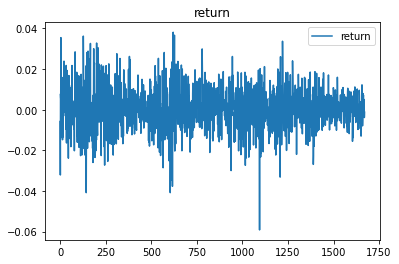

In [112]:
#Plot retunrs , they seem to be lot noisy 
import matplotlib.pyplot as plt
ax1 = data['return'].plot(style=['-'])
plt.title("return")
ax1.legend()
plt.plot()

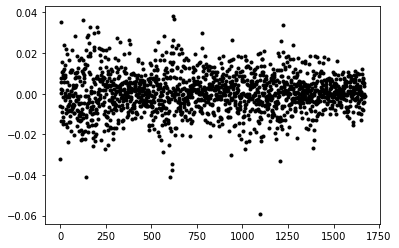

In [113]:
#Check using more visulaization and see outliyers. We seem to have few of them.
data['return'].plot(style='k.')
plt.show()

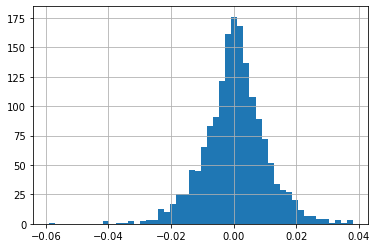

In [114]:
#Data is not normal and sharper
data['return'].hist(bins=50)
plt.show()

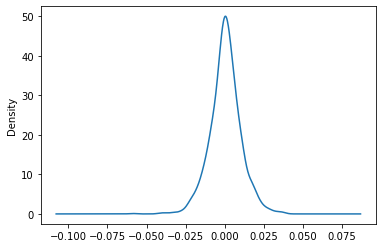

In [115]:
# Better view shows distribution of data and spreed. 
data['return'].plot(kind='kde')
plt.show()

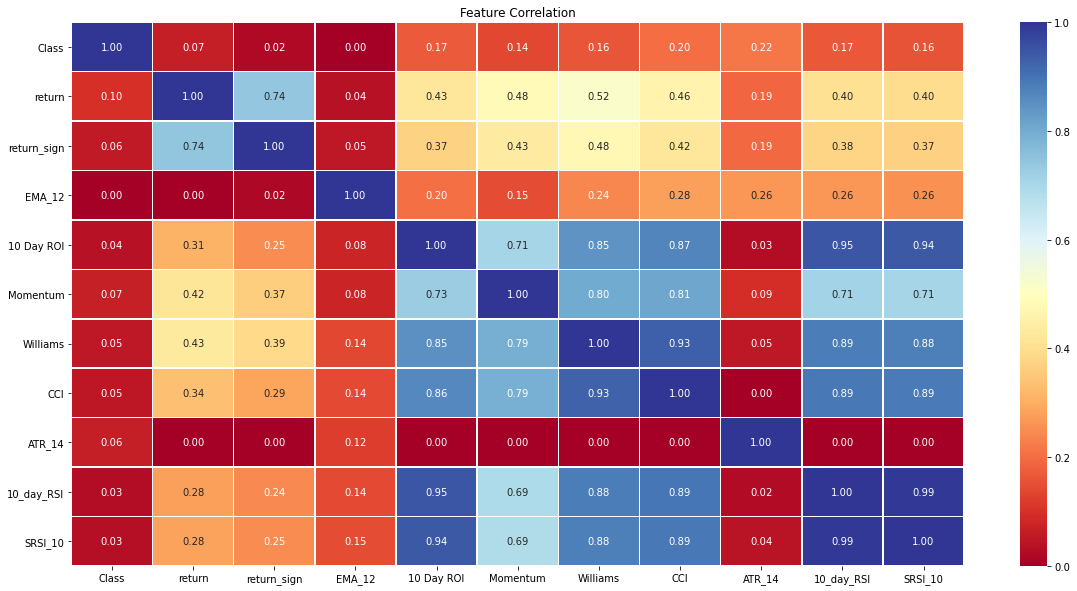

In [116]:
#Check co-relation to understanding which features may be dropped
nonlagged = data.filter(['Class','return','return_sign','EMA_12','10 Day ROI','MACD_26','Momentum','MACD_12_36','Williams','CCI','ATR_14','10_day_RSI','SRSI_10'],axis=1).corr()
scale = MinMaxScaler()
nonlagged = pd.DataFrame(scale.fit_transform(nonlagged.values), columns=nonlagged.columns, index=nonlagged.index)
# Visualize feature correlation
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(nonlagged, annot=True, annot_kws={"size": 10}, fmt="0.2f", linewidths=0.5, square=False, cbar=True, cmap='RdYlBu')
ax.set_title('Feature Correlation', fontsize=12, color='black');

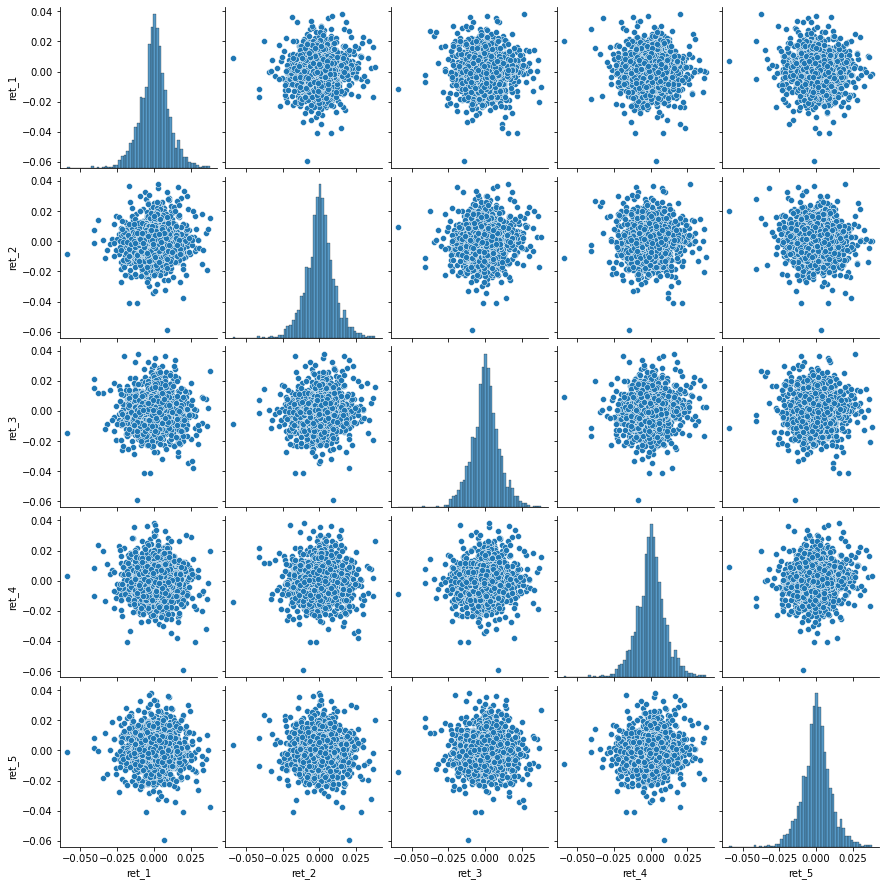

In [119]:
#Check with in the lag parameters which one are interesting. Those who do not show linear relation will be interesting
#Those which seem to have linear relation will be redundent.
lagged = data.filter(['ret_1','ret_2','ret_3','ret_4','ret_5'])
sns.pairplot(lagged)

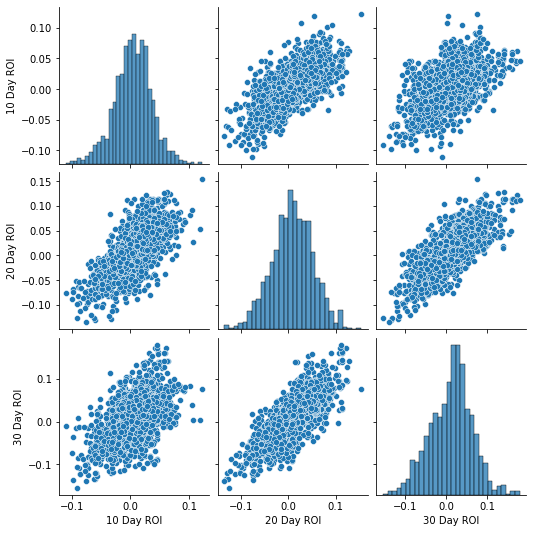

In [120]:
lagged = data.filter(['10 Day ROI','20 Day ROI','30 Day ROI'])
sns.pairplot(lagged)

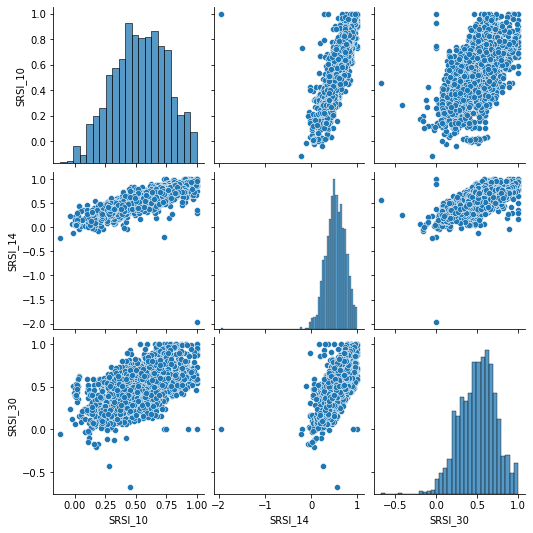

In [121]:
lagged = data.filter(['SRSI_10','SRSI_14','SRSI_30'])
sns.pairplot(lagged)

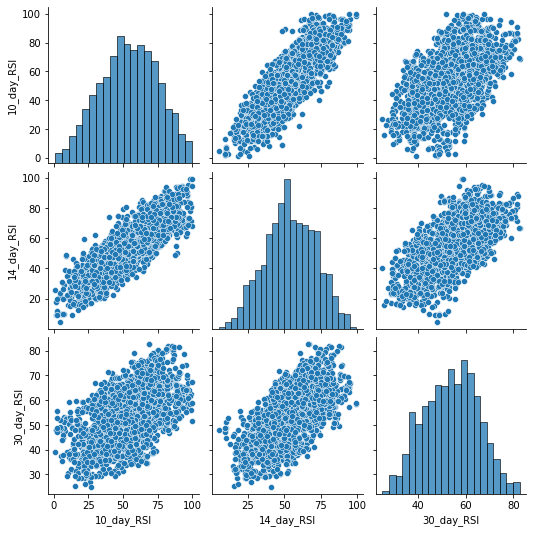

In [122]:
lagged = data.filter(['10_day_RSI','14_day_RSI','30_day_RSI'])
sns.pairplot(lagged)

In [126]:
#Scale data. 
scale = MinMaxScaler()
columns = data.columns
data = scale.fit_transform(data)

In [127]:
data = pd.DataFrame(data, columns = columns)

In [128]:
#Filter the non important features based on above EDA
data = data.filter(['Class','Momentum','10_day_RSI','30_day_RSI','MACD_12_26','SRSI_10','SRSI_14','CCI'],axis=1)


In [129]:
data.head()

,Class,Momentum,10_day_RSI,30_day_RSI,MACD_12_26,SRSI_10,SRSI_14,CCI
0,0.0,0.516824,0.655836,0.280498,0.412587,1.000000,0.000000,0.548667
1,0.0,0.329059,0.520632,0.153219,0.380520,0.756158,0.594335,0.340243
2,1.0,0.429725,0.490087,0.216101,0.365509,0.701071,0.725365,0.332553
3,1.0,0.406235,0.384950,0.271700,0.361724,0.511456,0.882235,0.473652
4,1.0,0.593255,0.523528,0.373746,0.399751,0.761382,1.000000,0.641547


In [73]:
#Split the data in train and test
#80% train and 20% test
train = data.iloc[:int(data.shape[0]*.7)]
test  = data.iloc[int(data.shape[0]*.7):]

In [74]:
#Dump to CSV
train_path = os.path.join(data_dir, 'train.csv')
train.to_csv(train_path,header=None,index=False)

In [75]:
#Dump to CSV
test_path = os.path.join(data_dir, 'test.csv')
test.to_csv(test_path,header=None,index=False)